In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline 

# 1. First derivative at a point 

First I write the vector to use in the calculations with the begin and end points too add the $dx$

In [4]:
xo = -1; xf = 1;dx=0.01
x = np.linspace(-1,1,int((xf-xo)/dx))

By definition 

$$\left(\frac{df}{dx}\right)_{i} = \frac{f_{i+1}-f_{i}}{x_{i+1}-x_{i}}\qquad \text{Forward difference}$$
$$\left(\frac{df}{dx}\right)_{i} = \frac{f_{i}-f_{i-1}}{x_{i}-x_{i-1}}\qquad \text{Backward difference}$$
$$\left(\frac{df}{dx}\right)_{i} = \frac{f_{i+1}-f_{i-1}}{x_{i+1}-x_{i-1}}\qquad \text{Central difference}$$

Define the function and present the result in $x = 0$

In [59]:
def f(x):
    return x - np.sin(x)

def F(x):
    return 1-np.cos(x)

M = len(x)/2
print "x =", x[M]
print "Forward difference", (f(x[M+1])-f(x[M]))/(x[M+1]-x[M])
print "Backward difference",(f(x[M])-f(x[M-1]))/(x[M]-x[M-1])
print "Central difference",(f(x[M+1])-f(x[M-1]))/(x[M+1]-x[M-1])



x = 0.005025125628140614
Forward difference 5.471178011882199e-05
Backward difference 4.2086426158974915e-06
Central difference 2.946021136735988e-05


# 2. First derivative of a function

Now I calculate the derivatice in the interval $-1\leq x \leq 1$. I fix the analysis in the boundaries at the $x_{o}$ and $x_{f}$. In the $x_{o}$ point I use for the derivative the forward difference end the point $x_{f}$ the Backward diferrence but in the second order to preserve the accuracy of the total derivative. Then.

$$\left(\frac{df}{dx}\right)_{i} = \frac{-3f_{i}+4f_{i+1}-f_{i+2}}{2(x_{i+1}-x_{i})}\qquad \text{Forward}$$
$$\left(\frac{df}{dx}\right)_{i} = \frac{3f_{i}-4f_{i-1}+f_{i-2}}{2(x_{i}-x_{i-1})}\qquad \text{Backward}$$




In [36]:
df = np.zeros(len(x))
df[0] = 0.5*(-3.0*f(x[0])+4.0*f(x[1])-f(x[2]))/(x[1]-x[0])

for i in range(1,len(x)-1):
    df[i] = (f(x[i+1])-f(x[i-1]))/(x[i+1]-x[i-1])
    
df[-1] = 0.5*(3.0*f(x[len(x)-1])-4.0*f(x[len(x)-2])+f(x[len(x)-3]))/(x[len(x)-1]-x[len(x)-2])

Comparison between analytical and numerical soulution

The error is:  0.8551627179306588 %


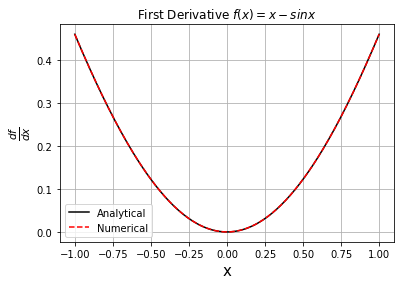

In [79]:
plt.plot(x,F(x),"k-",label = "Analytical")
plt.plot(x,df,"r--",label = "Numerical")
plt.grid(True)
plt.title("First Derivative $f(x) = x-sinx$")
plt.xlabel("x",fontsize = 15)
plt.ylabel("$\\frac{df}{dx}$",fontsize = 15)
plt.legend()

print "The error is: ",100*np.abs(np.mean(((F(x)-df)/df))),"%"

# 3. Second derivative of a function


Consider the taylor expansion in this positions $x_{i+1}$ and $x_{i-1}$

$$f_{i+1} = f_{i} + (x_{i+1}-x_{i})\left(\frac{df}{dx}\right)_{i}+\frac{(x_{i+1}-x_{i})^{2}}{2}\left(\frac{d^{2}f}{dx^{2}}\right)_{i} + H$$

$$f_{i-1} = f_{i} + (x_{i-1}-x_{i})\left(\frac{df}{dx}\right)_{i}+\frac{(x_{i-1}-x_{i})^{2}}{2}\left(\frac{d^{2}f}{dx^{2}}\right)_{i} + H$$

sum this results and consider the definition of central differences for the first derivative

$$\left(\frac{d^{2}f}{dx^{2}}\right)_{i}=\frac{(f_{i+1}-2f_{i}+f_{i-1})(x_{i+1}-x_{i-1})-(x_{i+1}-x_{i}+x_{i+1}-x_{i})(f_{i+1}-f_{i-1})}{\frac{1}{2}\left[(x+{i+1}-x_{i})^{2}+(x_{i-1}-x_{i})^{2}\right]}$$

The result is,  for central difference

$$\left(\frac{d^{2}f}{dx^{2}}\right)_{i} = \frac{f_{i+1}(x_{i}-x_{i-1})+f_{i-1}(x_{i+1}-x_{i})-f_{i}(x_{i+1}-x_{i-1})}{\frac{1}{2}(x_{i+1}-x_{i-1})(x_{i+1}-x_{i})(x_{i}-x_{i-1})}$$

For the Forward and Backward differences I use the geometrical interpretation. The second derivative is the slope of the line tangent to the curve, inserting approximations for the firts derivatives at locations $x_{i+1}$ and $x_{i}$, the second derivative

Forward

$$\left(\frac{d^{2}f}{dx^{2}}\right)_{i}  \approx \frac{\left(\frac{df}{dx}\right)_{i+1}-\left(\frac{df}{dx}\right)_{i}}{x_{i+1}-x_{i}}$$

$$\left(\frac{d^{2}f}{dx^{2}}\right)_{i}  \approx \frac{(f_{i+2}-f_{i+1})(x_{i+1}-x_{i})-(f_{i+1}-f_{i})(x_{i+2}-x_{i+1})}{(x_{i+2}-x_{i+1})(x_{i+1}-x_{i})(x_{i+1}-x_{i})}$$

Backward, insert the first derivative in the point $x_{i}$ and $x_{i-1}$

$$\left(\frac{d^{2}f}{dx^{2}}\right)_{i}  \approx \frac{\left(\frac{df}{dx}\right)_{i}-\left(\frac{df}{dx}\right)_{i-1}}{x_{i}-x_{i-1}}$$


$$\left(\frac{d^{2}f}{dx^{2}}\right)_{i}  \approx \frac{(f_{i}-f_{i-1})(x_{i-1}-x_{i-2})-(f_{i-1}-f_{i-2})(x_{i}-x_{i-1})}{(x_{i}-x_{i-1})(x_{i}-x_{i-1})(x_{i-1}-x_{i-2})}$$



x = 0.005025125628140614
Forward difference 0.014865322801593688
Backward difference 0.0006280685416769046
Central difference 0.005025062181540994
The error is:  0.007387949294983289 %


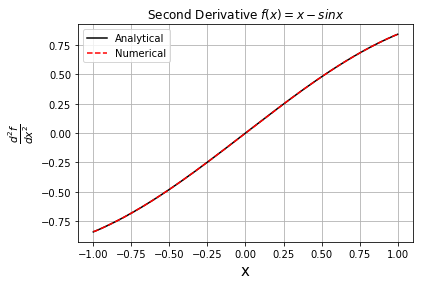

In [88]:
ddf = np.ones(len(x))
ddf[0] = ((f(x[2])-f(x[1]))*(x[1]-x[0])-(f(x[1])-f(x[0]))*(x[2]-x[1]))/((x[2]-x[1])*(x[1]-x[0])*(x[1]-x[0]))
for i in range(1,len(x)-1):
    ddf[i] = 2.0*(f(x[i+1])*(x[i]-x[i-1])+f(x[i-1])*(x[i+1]-x[i])-f(x[i])*(x[i+1]-x[i-1]))/((x[i+1]
                                                            -x[i-1])*(x[i+1]-x[i])*(x[i]-x[i-1])) 
    
ddf[-1] = ((f(x[len(x)-1])-f(x[len(x)-2]))*(x[len(x)-2]-x[len(x)-3])-(f(x[len(x)-2])
            -f(x[len(x)-3]))*(x[len(x)-1]-x[len(x)-2]))/((x[len(x)-1]-x[len(x)-2])*(x[len(x)-1]
                                            -x[len(x)-2])*(x[len(x)-2]-x[len(x)-3]))
    
print "x =", x[M]
print "Forward difference", ((f(x[M+2])-f(x[M+1]))*(x[M+1]-x[M]) - (f(x[M+1]-f(x[M])))*(x[M+2]-x[M+1]))/((x[M+2]-x[M+1])*(x[M+1]-x[M])*(x[M+1]-x[M]))
print "Backward difference",((f(x[M])-f(x[M-1]))*(x[M-1]-x[M-2]) - (f(x[M-1]-f(x[M-2])))*(x[M]-x[M-1]))/((x[M]-x[M-1])*(x[M]-x[M-1])*(x[M-1]-x[M-2]))
print "Central difference",2.0*(f(x[M+1])*(x[M]-x[M-1])+f(x[M-1])*(x[M+1]-x[M])-f(x[M])*(x[M+1]-x[M-1]))/((x[M+1]
                                                            -x[M-1])*(x[M+1]-x[M])*(x[M]-x[M-1])) 


plt.plot(x,np.sin(x),"k-",label = "Analytical")
plt.plot(x,ddf,"r--",label = "Numerical")
plt.grid(True)
plt.title("Second Derivative $f(x) = x-sinx$")
plt.xlabel("x",fontsize = 15)
plt.ylabel("$\\frac{d^{2}f}{dx^{2}}$",fontsize = 15)
plt.legend()

print "The error is: ",100*np.abs(np.mean(((np.sin(x)-ddf)/ddf))),"%"

# Interpolation

Implement a routine taht generates Lagrangean interpolating polynomials of arbitrary degree n based on $n+1$ data points. Then reproduce the figure show in clas. for $f(x) = \frac{1}{25x^{2}+1}$ in the interval $[-1,1]$ with polynomials of degrees $n=6$,$n=8$,$n=10$,$n=12$. 

The proble of constructing a continous function from discrete data is called *data fitting*. I use the idea of interpolation, in wich the goal is to find a linear combination of n know functions to fit a set of data that imposes n constrains, thus guaranteeing a unique solution that fits the data exactly.

the points $x_{o},\dots,x_{n}$ are called *interpolation points*. The polynomial $p_{n}(x)$ is called the *interpolation polynomial* of the data $(x_{o},y_{0}),\dots,(x_{n},x_{n})$. 

The most simple method of computing the interpolation polynomial os to form the system $A\mathbf{x} = \mathbf{b}$, where, $b_{i} = y_{i}$, $i=0,\dots,n$ and the entries of A are defined by $a_{ij}=p_{j}(x_{i})$, $i,j=0,\dots,n$. The basis $\{1,x,\dots,x^{n}\}$ of the space of polynomials of degre $n+1$ is calle the *monomial basis*, and the correspondin matrix $A$ is called the *Vandermonde matriz*

In *Lagrange interpolation*, the matrix $A$ is simply the identity matrix, by virtue of the fact that the interpolating polynomial is written in the form

$$p_{n}(x) = \sum_{j=0}^{n}y_{j}\mathcal{L}_{n,j}(x)$$,

where the polynomilas $\{\mathcal{L}_{n,j}\}_{j=0}^{n}$ have the property that 


$$ \mathcal{L}_{n,j}(x_{i})=   \left\{
\begin{array}{ll}
      1 & \text{if} \qquad i = j \\
      -1 & \text{if} \qquad i\neq j\\
\end{array} 
\right.  $$ 

The polynomials $\{\mathcal{L}_{n,j}\}_{j=0}^{n}$ are called the *Lagrange polynomials* for thr interpolation points $x_{o},\dots,x_{n}$. There are defined by 

$$\{\mathcal{L}_{n,j}\}_{j=0}^{n} = \prod_{k=0,k\neq j}^{n}\frac{x-x_{k}}{x_{j}-x_{k}}$$

As the following result indicates, the problem of polynomial interpolation can be solved using Lagrange polynomials





###### Theorem

Let $x_{o}, \dots,x_{n}$ be $n+1$ distinct number, and let $f(x)$ be a function defined on a domain containing these numbers. Then the polynomial defined by 

$$p_{n}(x) = \sum_{j=0}^{n}f(x_{j})\mathcal{L}_{n,j}$$

is the unique polynomial of degree n that satisfies 

$$p_{n}(x_{j})=f(x_{j}),\qquad j=0,1,\dots,n$$

The polynomial $p_{n}(x)$ is called the *interpolating polynomial* of $f(x)$. We say that $p_{x}(x)$ *interpolates* $f(x)$ at the points $x_{o},\dots,x_{n}$
 


$$\{\mathcal{L}_{n,j}\}_{j=0}^{n} = \prod_{k=0,k\neq j}^{n}\frac{x-x_{k}}{x_{j}-x_{k}}$$

In [150]:
def L(xi,yi,x):
    data = zip(xi,yi)
    n = len(data)
    nx = len(x)
    dx = [d[0] for d in data]
    dy = [d[1] for d in data]
    La = [0.]*(nx)
    def b(j,xi):
        v = 1.0
        for k in range(n):
            if k != j:
                v *= (xi-dx[k])/(dx[j]-dx[k])
        return v
    for i,xi in enumerate(x):
        for j in xrange(n):
            La[i] +=dy[j]*b(j,xi)
    
    return La
        

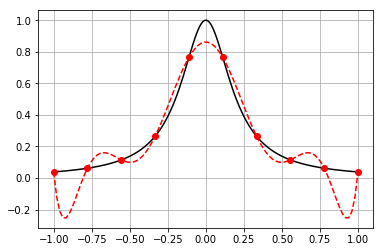

In [166]:
x = lambda n: np.linspace(-1,1,n)
f = lambda x: 1/(25*x**2 + 1)

xi = x(10)
yi = f(x(10))

plt.plot(x(250),f(x(250)),"k-")
plt.plot(x(100),L(xi,yi,x(100)),"r--",label = "interpolacion")
plt.plot(xi,yi,"ro",label = "Puntos experimentales")
plt.grid(True)

#Se hace una funcion para el plot#

def plot(n):
    x = lambda n: np.linspace(-1,1,n)
    f = lambda x: 1/(25*x**2 + 1)

    xi = x(n)
    yi = f(x(n))

    plt.plot(x(250),f(x(250)),"k-")
    plt.plot(x(100),L(xi,yi,x(100)),"r--",label = "interpolacion")
    plt.plot(xi,yi,"ro",label = "Puntos experimentales")
    plt.grid(True)
    

## n = 6

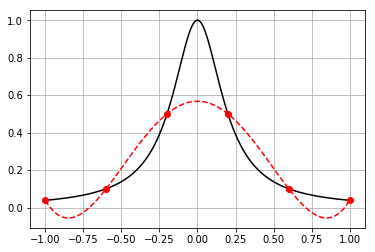

In [167]:
plot(6)

## n= 8

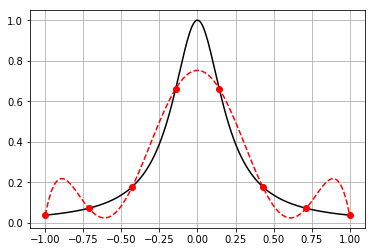

In [168]:
plot(8)

## n=10

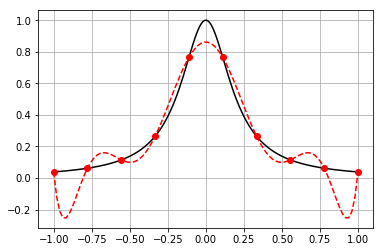

In [169]:
plot(10)

## n=12

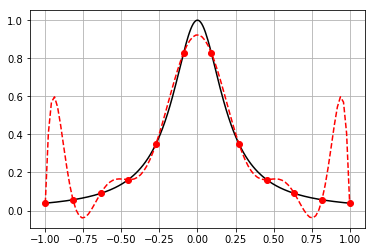

In [170]:
plot(12)

## n = 24

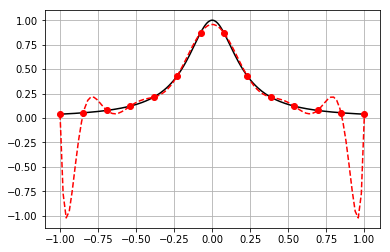

In [173]:
plot(14)